In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

# Read Data

In [2]:
df_sf=pd.read_csv('../1 Input Data/Police_Department_Incidents_-_Previous_Year__2016_.csv')

# Data Processing

In [3]:
df_sf['lat']=df_sf['Y']
df_sf['long']=df_sf['X']

df_sf['time_dt']=df_sf['Time'].apply(lambda x:datetime.time(int(x[0:2]),int(x[3:5]),0))
df_sf['time_hours']=df_sf['time_dt'].apply(lambda x:x.hour+x.minute/60)


# Describe and visualise Data

In [4]:
df_sf.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId,lat,long,time_dt,time_hours
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120,37.775421,-122.403405,11:00:00,11.000000
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168,37.775421,-122.403405,11:00:00,11.000000
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010,37.729981,-122.388856,14:59:00,14.983333
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000,37.785788,-122.412971,23:50:00,23.833333
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000,37.765050,-122.419672,00:30:00,0.500000


In [5]:
print('Shape of data: ',df_sf.shape)

Shape of data:  (150500, 17)


In [6]:
print('Number of locations',df_sf['Address'].nunique())

Number of locations 16130


## Category of crimes

In [7]:
df_sf['Category'].value_counts()

LARCENY/THEFT                  40409
OTHER OFFENSES                 19599
NON-CRIMINAL                   17866
ASSAULT                        13577
VANDALISM                       8589
VEHICLE THEFT                   6419
WARRANTS                        5914
BURGLARY                        5802
SUSPICIOUS OCC                  5782
MISSING PERSON                  4338
DRUG/NARCOTIC                   4243
ROBBERY                         3299
FRAUD                           2635
SECONDARY CODES                 1841
TRESPASS                        1812
WEAPON LAWS                     1658
SEX OFFENSES, FORCIBLE           940
STOLEN PROPERTY                  882
RECOVERED VEHICLE                736
DISORDERLY CONDUCT               658
PROSTITUTION                     641
FORGERY/COUNTERFEITING           619
DRUNKENNESS                      465
DRIVING UNDER THE INFLUENCE      378
ARSON                            286
KIDNAPPING                       257
EMBEZZLEMENT                     168
L

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'LARCENY/THEFT'),
  Text(1, 0, 'OTHER OFFENSES'),
  Text(2, 0, 'NON-CRIMINAL'),
  Text(3, 0, 'ASSAULT'),
  Text(4, 0, 'VANDALISM'),
  Text(5, 0, 'VEHICLE THEFT'),
  Text(6, 0, 'WARRANTS'),
  Text(7, 0, 'BURGLARY'),
  Text(8, 0, 'SUSPICIOUS OCC'),
  Text(9, 0, 'MISSING PERSON')])

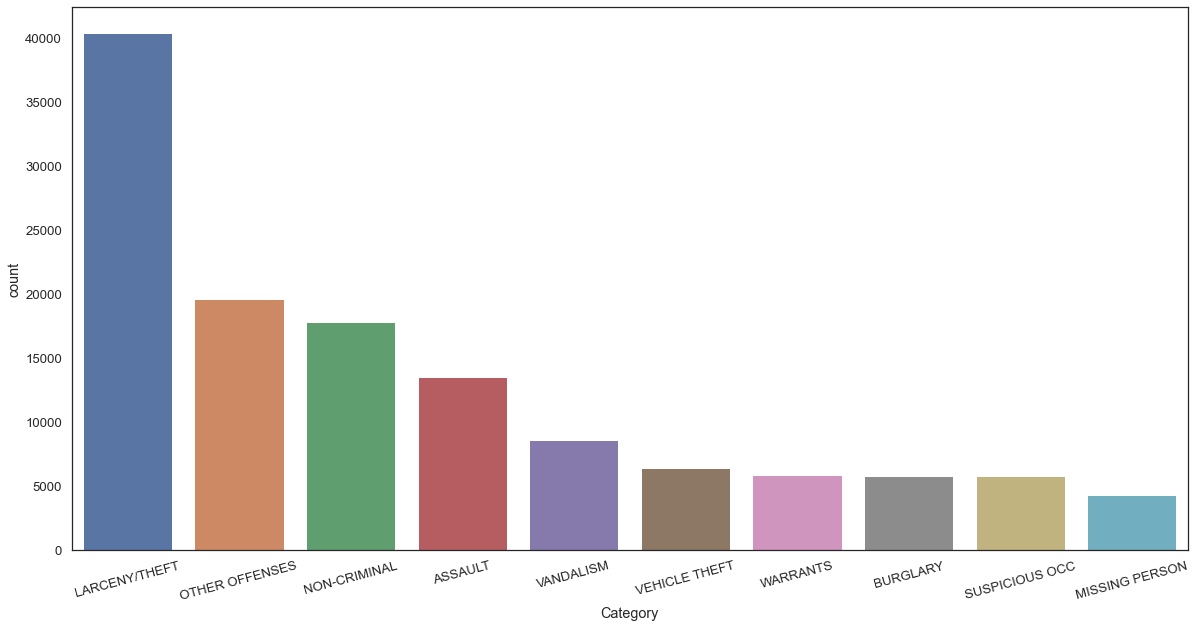

In [8]:
# visualise the n most common categories
n=10
list_categories=df_sf['Category'].value_counts().index[0:n]

plt.figure(figsize=(20,10))
sns.set(style='white',font_scale=1.2)

g=sns.countplot(df_sf[df_sf['Category'].isin(list_categories)]['Category'],order=list_categories)
plt.xticks(rotation=15)


## Day of week

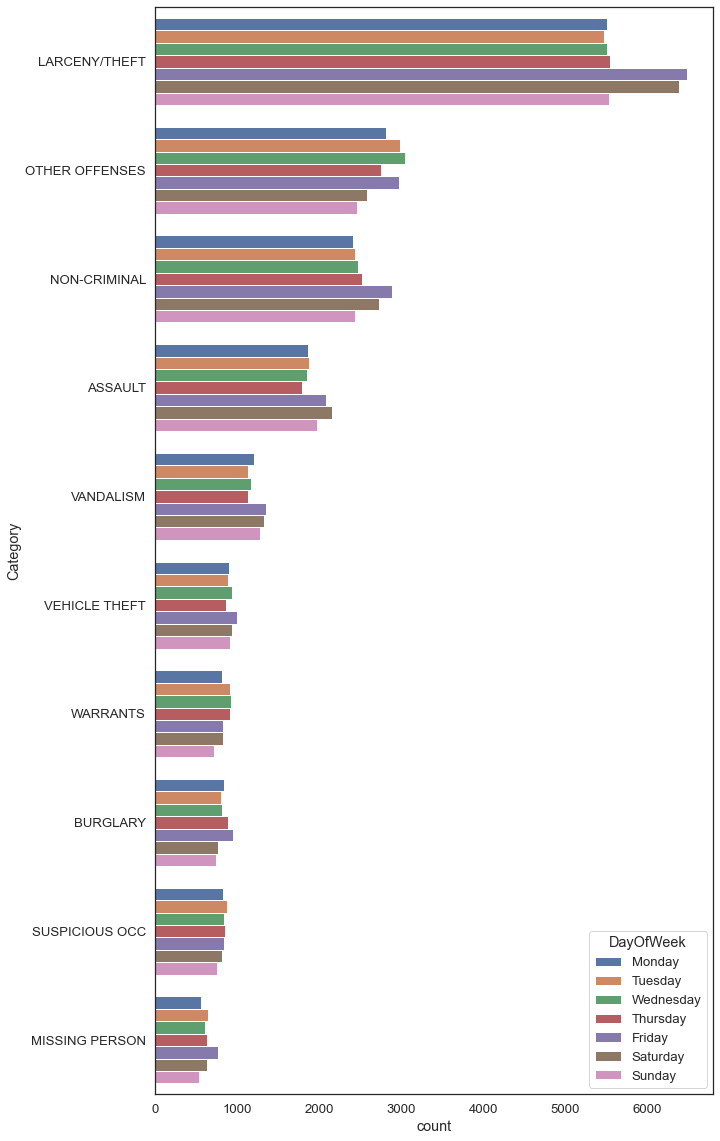

In [9]:
df=df_sf[df_sf['Category'].isin(list_categories)]

plt.figure(figsize=(10,20))

g=sns.countplot(y='Category',hue='DayOfWeek',data=df,order=list_categories,orient='v',hue_order=['Monday',
                                                                                                'Tuesday',
                                                                                                 'Wednesday',
                                                                                                 'Thursday',
                                                                                                 'Friday',
                                                                                                 'Saturday',
                                                                                                 'Sunday'])


- Spike in thefts on Friday and Saturday

## Time of day

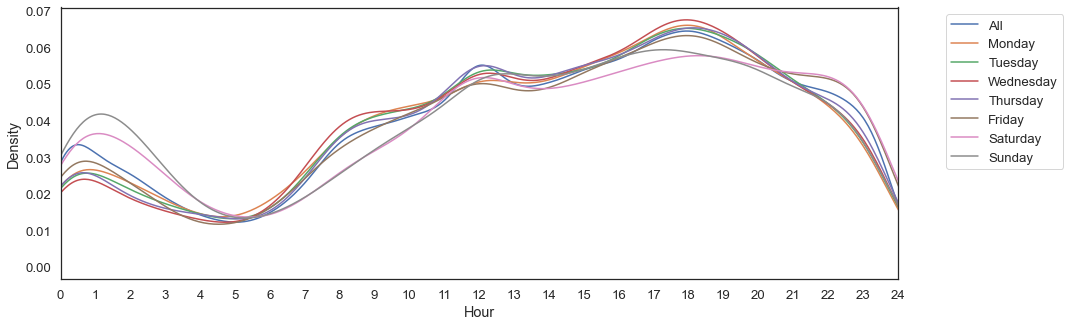

In [10]:
plt.figure(figsize=(15,5))

df_sf['time_hours'].plot(kind='kde',xlim=(0,24),xticks=np.linspace(0,24,25),label='All')
df_sf[df_sf['DayOfWeek']=='Monday']['time_hours'].plot(kind='kde',xlim=(0,24),xticks=np.linspace(0,24,25),label='Monday')
df_sf[df_sf['DayOfWeek']=='Tuesday']['time_hours'].plot(kind='kde',xlim=(0,24),xticks=np.linspace(0,24,25),label='Tuesday')
df_sf[df_sf['DayOfWeek']=='Wednesday']['time_hours'].plot(kind='kde',xlim=(0,24),xticks=np.linspace(0,24,25),label='Wednesday')
df_sf[df_sf['DayOfWeek']=='Thursday']['time_hours'].plot(kind='kde',xlim=(0,24),xticks=np.linspace(0,24,25),label='Thursday')
df_sf[df_sf['DayOfWeek']=='Friday']['time_hours'].plot(kind='kde',xlim=(0,24),xticks=np.linspace(0,24,25),label='Friday')
df_sf[df_sf['DayOfWeek']=='Saturday']['time_hours'].plot(kind='kde',xlim=(0,24),xticks=np.linspace(0,24,25),label='Saturday')
df_sf[df_sf['DayOfWeek']=='Sunday']['time_hours'].plot(kind='kde',xlim=(0,24),xticks=np.linspace(0,24,25),label='Sunday')


plt.xlabel('Hour')
plt.legend(bbox_to_anchor=[1.05,1],loc=2)

## Coordinates visualisation

In [11]:
df_sf.columns

Index(['IncidntNum', 'Category', 'Descript', 'DayOfWeek', 'Date', 'Time',
       'PdDistrict', 'Resolution', 'Address', 'X', 'Y', 'Location', 'PdId',
       'lat', 'long', 'time_dt', 'time_hours'],
      dtype='object')

### All incidents

<AxesSubplot:xlabel='long', ylabel='lat'>

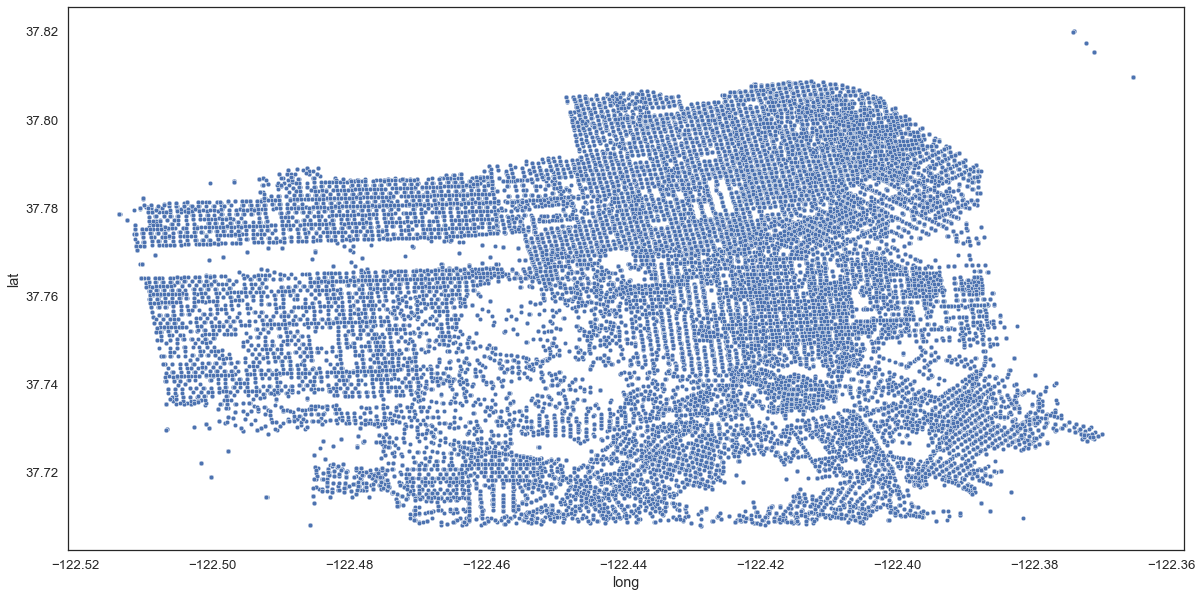

In [12]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='long',y='lat',data=df_sf,s=20)



### Incidents on one day of the week

<AxesSubplot:xlabel='long', ylabel='lat'>

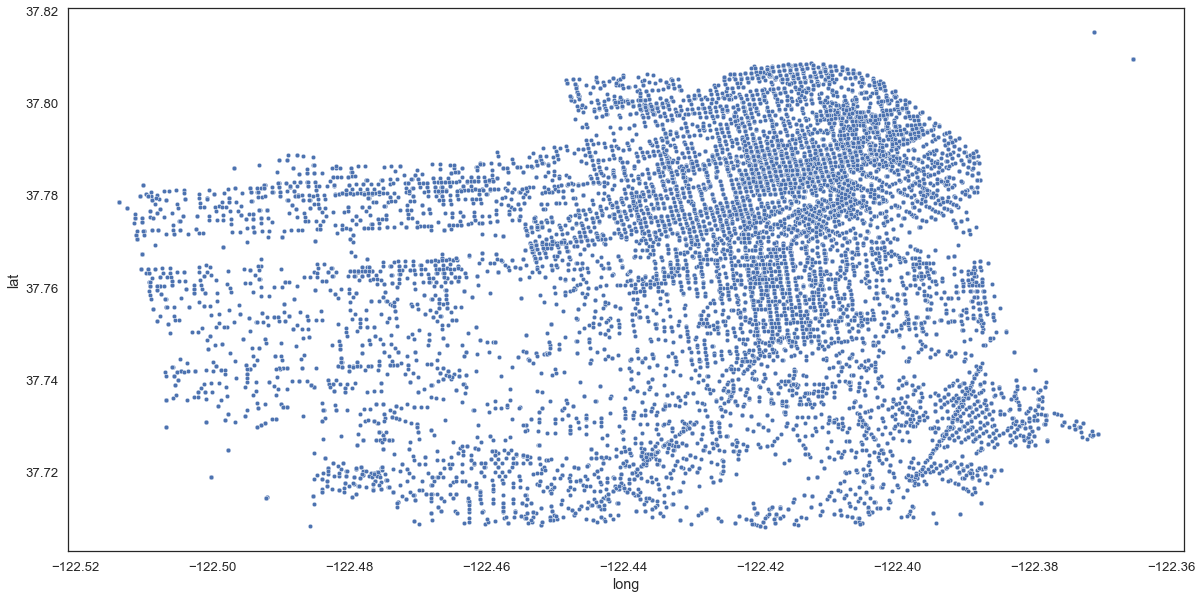

In [13]:
df=df_sf[df_sf['DayOfWeek']=='Friday']

plt.figure(figsize=(20,10))
sns.scatterplot(x='long',y='lat',data=df,s=20)


In [14]:
df_address_num=df_sf.groupby(by=['Location','long','lat'])['IncidntNum'].count().to_frame().reset_index()
df_address_num=df_address_num.sort_values(by='IncidntNum',ascending=False)
df_address_num.head()

,Location,long,lat,IncidntNum
12618,"(37.775420706711, -122.403404791479)",-122.403405,37.775421,3536
8304,"(37.7564864109309, -122.406539115148)",-122.406539,37.756486,625
15042,"(37.7841893501425, -122.407633520742)",-122.407634,37.784189,624
15262,"(37.7850629421661, -122.406520987144)",-122.406521,37.785063,513
10438,"(37.7650501214668, -122.419671780296)",-122.419672,37.765050,494


### Scale by number of incidents

<AxesSubplot:xlabel='long', ylabel='lat'>

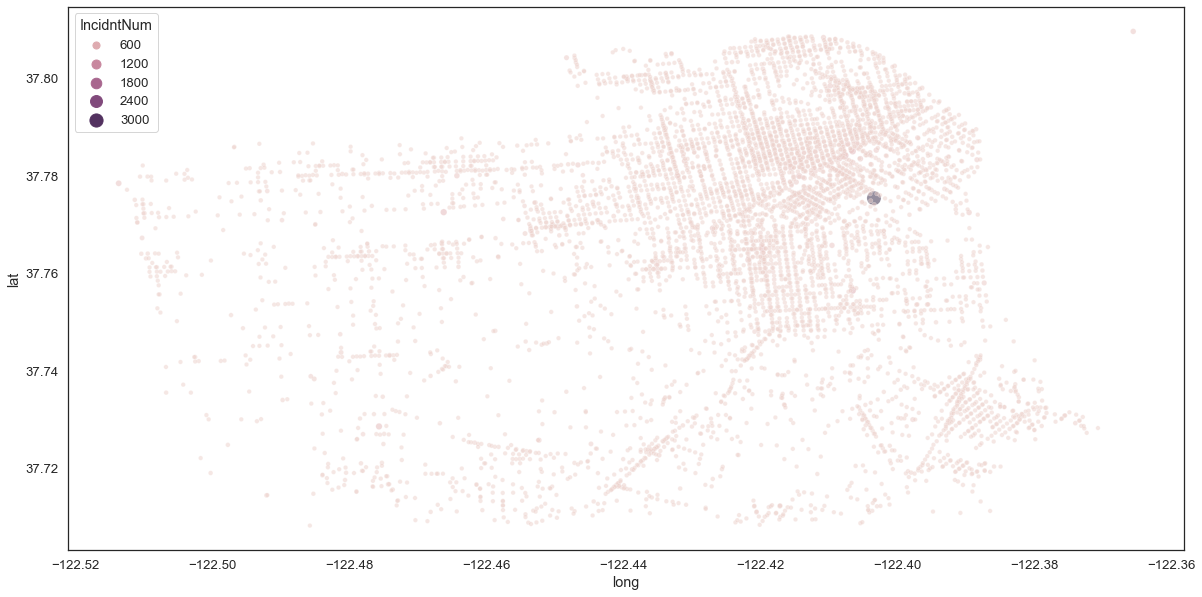

In [15]:
plt.figure(figsize=(20,10))

#At least 100
df=df_address_num[df_address_num['IncidntNum']>5]

sns.scatterplot(x='long',y='lat',data=df,size='IncidntNum', sizes=(20, 200),hue='IncidntNum',alpha=0.5)

## Resolution of crimes

In [16]:
df_sf['Resolution'].value_counts()

NONE                                      107780
ARREST, BOOKED                             39416
UNFOUNDED                                   1608
JUVENILE BOOKED                             1056
EXCEPTIONAL CLEARANCE                        371
ARREST, CITED                                144
CLEARED-CONTACT JUVENILE FOR MORE INFO        58
NOT PROSECUTED                                22
LOCATED                                       20
PSYCHOPATHIC CASE                             17
JUVENILE CITED                                 3
JUVENILE DIVERTED                              2
COMPLAINANT REFUSES TO PROSECUTE               2
PROSECUTED BY OUTSIDE AGENCY                   1
Name: Resolution, dtype: int64

In [17]:
# Creating three categories

conditions= [df_sf['Resolution']=='NONE',
            df_sf['Resolution']=='ARREST, BOOKED']

choices=['None','ARREST, BOOKED']

df_sf['Resolution_category']=np.select(conditions,choices,default='Other')

In [18]:
# Calculating the proportion with None, Arrest, or Other for each category of crime

df_category_resolution=df_sf.groupby(by='Category')['Resolution_category'].value_counts(normalize=True).to_frame()
df_category_resolution.columns=['Percentage']
df_category_resolution=df_category_resolution.reset_index()

df_category_resolution['Percentage']=df_category_resolution['Percentage']*100

df_category_resolution.head()

,Category,Resolution_category,Percentage
0,ARSON,None,72.027972
1,ARSON,"ARREST, BOOKED",25.524476
2,ARSON,Other,2.447552
3,ASSAULT,None,58.451793
4,ASSAULT,"ARREST, BOOKED",39.890992


In [19]:
order_by_arrests=df_category_resolution[df_category_resolution['Resolution_category']=='ARREST, BOOKED'].sort_values(by='Percentage',ascending=False)['Category']
order_by_arrests

17     DRIVING UNDER THE INFLUENCE
105                       WARRANTS
20                   DRUG/NARCOTIC
47                     LIQUOR LAWS
85                 STOLEN PROPERTY
64                    PROSTITUTION
23                     DRUNKENNESS
108                    WEAPON LAWS
59                  OTHER OFFENSES
39                        GAMBLING
96                        TRESPASS
50                       LOITERING
62         PORNOGRAPHY/OBSCENE MAT
15              DISORDERLY CONDUCT
31                 FAMILY OFFENSES
4                          ASSAULT
42                      KIDNAPPING
83      SEX OFFENSES, NON FORCIBLE
9                          BRIBERY
95                            TREA
34          FORGERY/COUNTERFEITING
77                 SECONDARY CODES
1                            ARSON
80          SEX OFFENSES, FORCIBLE
27                    EMBEZZLEMENT
71                         ROBBERY
12                        BURGLARY
37                           FRAUD
100                 

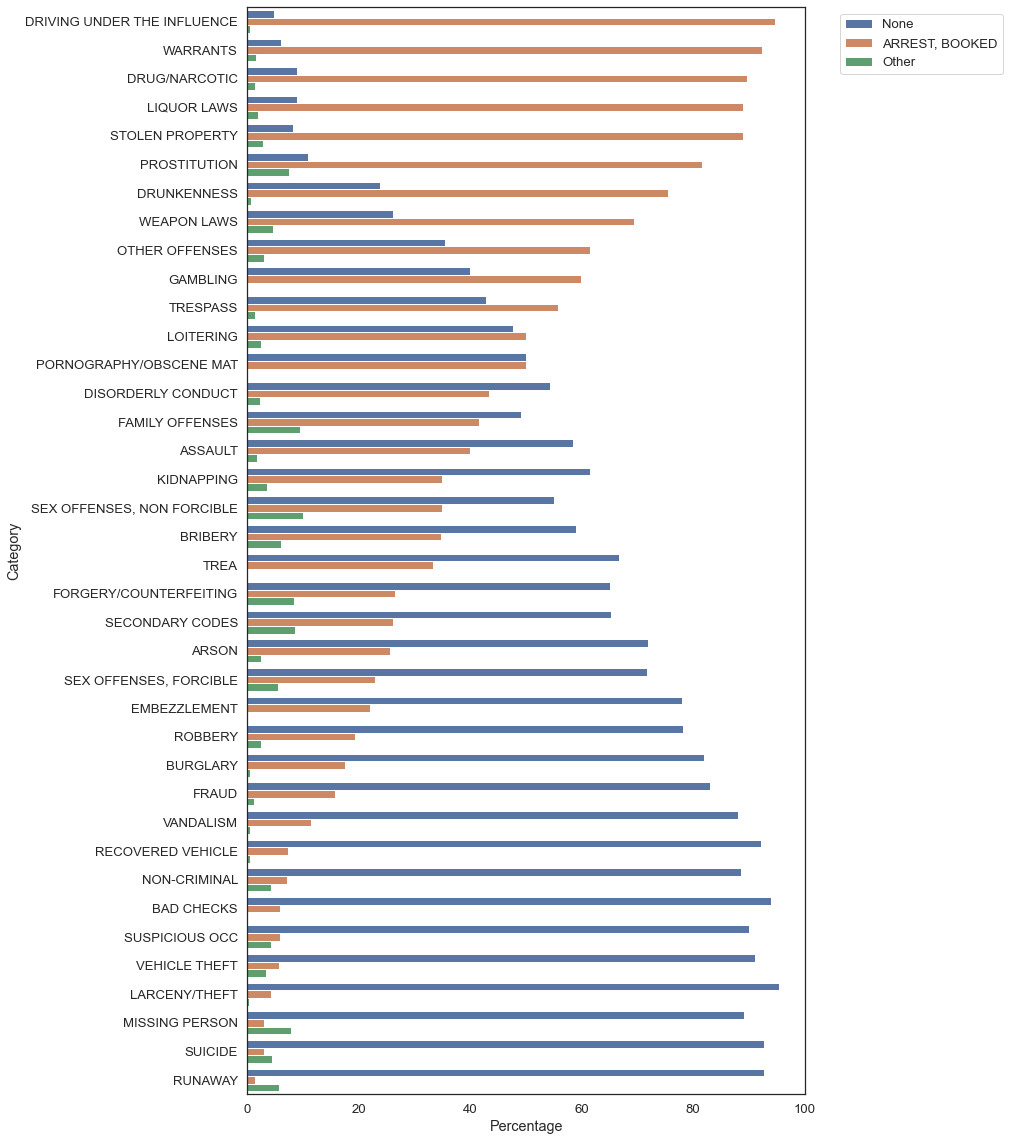

In [20]:
df=df_category_resolution.copy()

plt.figure(figsize=(10,20))


g=sns.barplot(y='Category',x='Percentage',hue='Resolution_category',data=df,
              order=order_by_arrests,
              hue_order=['None','ARREST, BOOKED','Other'],
              orient='h')

plt.legend(bbox_to_anchor=[1.05,1],loc=2)

> Here we can see which category of crimes were the most likely to lead to an arrest

## Districts

In [21]:
df_sf['PdDistrict'].value_counts()

SOUTHERN      28445
NORTHERN      20100
MISSION       19503
CENTRAL       17666
BAYVIEW       14303
INGLESIDE     11594
TARAVAL       11325
TENDERLOIN     9942
RICHMOND       8922
PARK           8699
Name: PdDistrict, dtype: int64

# Analysis

> Objective: Identify where the greatest police resources need to go in San Francisco

## Breakdown crime by district and category of crime

- For each category of crime, in each district, we can canculate how many incidents occurred, and what proportion was resolved

In [22]:
df_sf_district_category=df_sf.groupby(by=['PdDistrict','Category'])['IncidntNum'].count().reset_index()
print('Number of incidents by district and category')
df_sf_district_category.head()


Number of incidents by district and category


,PdDistrict,Category,IncidntNum
0,BAYVIEW,ARSON,71
1,BAYVIEW,ASSAULT,1775
2,BAYVIEW,BAD CHECKS,4
3,BAYVIEW,BRIBERY,20
4,BAYVIEW,BURGLARY,521


In [23]:
df_sf_district_category_resolution=df_sf.groupby(by=['PdDistrict','Category'])['Resolution_category'].value_counts(normalize=True).to_frame()
df_sf_district_category_resolution.columns=['Percentage']

df_sf_district_category_resolution=df_sf_district_category_resolution.reset_index()

df_sf_district_category_resolution['Percentage']=df_sf_district_category_resolution['Percentage']*100

df_sf_district_category_resolution

df_sf_district_category_resolution_arrest=df_sf_district_category_resolution[df_sf_district_category_resolution['Resolution_category']=='ARREST, BOOKED']

print('Percentage of arrests  in each category, in each district') 
df_sf_district_category_resolution_arrest

Percentage of arrests  in each category, in each district


,PdDistrict,Category,Resolution_category,Percentage
1,BAYVIEW,ARSON,"ARREST, BOOKED",8.450704
4,BAYVIEW,ASSAULT,"ARREST, BOOKED",36.450704
8,BAYVIEW,BRIBERY,"ARREST, BOOKED",35.000000
11,BAYVIEW,BURGLARY,"ARREST, BOOKED",16.698656
14,BAYVIEW,DISORDERLY CONDUCT,"ARREST, BOOKED",22.448980
...,...,...,...,...
889,TENDERLOIN,TRESPASS,"ARREST, BOOKED",72.519084
893,TENDERLOIN,VANDALISM,"ARREST, BOOKED",19.174041
896,TENDERLOIN,VEHICLE THEFT,"ARREST, BOOKED",11.111111
898,TENDERLOIN,WARRANTS,"ARREST, BOOKED",93.640054


In [24]:
df_sf_district_crime=df_sf_district_category.merge(df_sf_district_category_resolution_arrest,on=['PdDistrict','Category'],how='left')

# Set as 0 when no crimes have led to arrest
df_sf_district_crime['Percentage']=df_sf_district_crime['Percentage'].fillna(0)

df_sf_district_crime['Percentage without arrest']=100-df_sf_district_crime['Percentage']

print('Dataset of number of incidents, and % arrests, in each district for each category of crime')
df_sf_district_crime.head()

Dataset of number of incidents, and % arrests, in each district for each category of crime


,PdDistrict,Category,IncidntNum,Resolution_category,Percentage,Percentage without arrest
0,BAYVIEW,ARSON,71,"ARREST, BOOKED",8.450704,91.549296
1,BAYVIEW,ASSAULT,1775,"ARREST, BOOKED",36.450704,63.549296
2,BAYVIEW,BAD CHECKS,4,NaN,0.000000,100.000000
3,BAYVIEW,BRIBERY,20,"ARREST, BOOKED",35.000000,65.000000
4,BAYVIEW,BURGLARY,521,"ARREST, BOOKED",16.698656,83.301344


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'ASSAULT'),
  Text(1, 0, 'BURGLARY'),
  Text(2, 0, 'LARCENY/THEFT'),
  Text(3, 0, 'MISSING PERSON'),
  Text(4, 0, 'NON-CRIMINAL'),
  Text(5, 0, 'OTHER OFFENSES'),
  Text(6, 0, 'SUSPICIOUS OCC'),
  Text(7, 0, 'VANDALISM'),
  Text(8, 0, 'VEHICLE THEFT'),
  Text(9, 0, 'WARRANTS')])

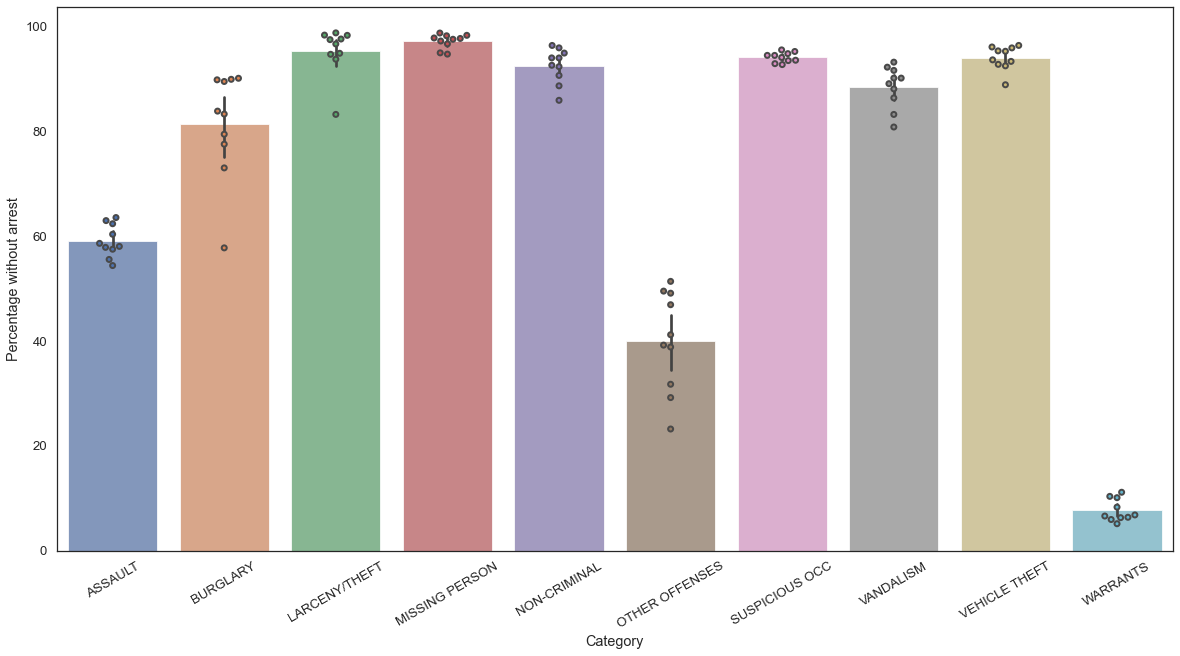

In [25]:
# finding which categories have the greatest variation in terms of % leading to arrests 
# only selected categories

df=df_sf_district_crime[df_sf_district_crime['Category'].isin(list_categories)]

plt.figure(figsize=(20,10))

sns.swarmplot(x='Category',y='Percentage without arrest',data=df,
         edgecolor='gray',
             linewidth=2)
sns.barplot(x='Category',y='Percentage without arrest',data=df,alpha=0.75)

plt.xticks(rotation=30)

> Each dot represents one ditrict, we can see that some categories of crime, e.g. burglaries, have more variation in arrest percentage

In [26]:
# check statistically

df=df_sf_district_crime[df_sf_district_crime['Category'].isin(list_categories)]
df.groupby(by=['Category'])['Percentage without arrest'].agg(['mean','std'])

,mean,std
Category,,
ASSAULT,59.122611,3.112666
BURGLARY,81.435109,10.235273
LARCENY/THEFT,95.384897,4.608800
MISSING PERSON,97.206694,1.367135
NON-CRIMINAL,92.549857,3.309060
OTHER OFFENSES,40.029513,9.552731
SUSPICIOUS OCC,94.141482,0.947894
VANDALISM,88.501751,3.987654
VEHICLE THEFT,94.020190,2.302265


> focus on burglary, which shows the greatest variation by district

# Burglaries

In [28]:
df_sf[df_sf['Category']=='BURGLAR']

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId,lat,long,time_dt,time_hours,Resolution_category
